In [1]:
import pandas as pd
import numpy as np
import glob 
import nibabel as nib 
from nilearn import plotting
import nilearn.plotting as plotting
import matplotlib.pyplot as plt
import seaborn as sns

import re
import shutil
import glob

In [3]:
# !!! Run it once !!!
# 
# -- Copy and rename rabies output tSNR map to export/tSNR -- 

# import re
# import shutil
# import glob

init_folder='/home/traaffneu/margal/code/multirat_se/script/'
analysis_folder='/project/4180000.19/multirat_stim/scratch/rabies_nordic/preprocess/'

tSNR_dir = analysis_folder+'export/tSNR/'
tsnr_list = glob.glob(analysis_folder+'/sub-020*/bold_datasink/tSNR_map_preprocess/*/_run_1/*')

for file_tsnr in tsnr_list:
    rat_id = re.search("sub-[0-9]{7,8}_ses-[0-9]", file_tsnr).group()               #find sub_id and ses_number in the path
    shutil.copyfile(file_tsnr, tSNR_dir+'/{}_tSNR_map_nordic.nii.gz'.format(rat_id))       #copy and rename with sub_id and ses_number


 #Uses regular expression to find the ID of the rat
    # The regular expression means the following :
    # sub- : search for sub- at the beginning of the string
    # [0-9]{7,8} : look for 7 to 8 numbers
    # _ses- : look for _ses-
    # [0-9] : look for a number


In [25]:
# -- Init variables -- 
init_folder='/home/traaffneu/margal/code/multirat_se/script/'
analysis_folder='/project/4180000.19/multirat_stim'
output_folder = analysis_folder+'/scratch/plots/tSNR/'

rabies_prepro_dir = analysis_folder+'/rabies/preprocess/'
nordic_prepro_dir = analysis_folder+'/scratch/rabies_nordic/preprocess/'
tSNR_rabies_dir = rabies_prepro_dir+'export/tSNR/'
tSNR_nordic_dir = nordic_prepro_dir+'export/tSNR/'

template_path ='/groupshare/traaffneu/preclinimg/templates/SIGMA_Wistar_Rat_Brain_TemplatesAndAtlases_Version1.1/SIGMA_Rat_Anatomical_Imaging/SIGMA_Rat_Anatomical_InVivo_Template/SIGMA_InVivo_Brain_Template.nii'
df_path='/home/traaffneu/margal/code/multirat_se/script/table/tSNR.tsv'

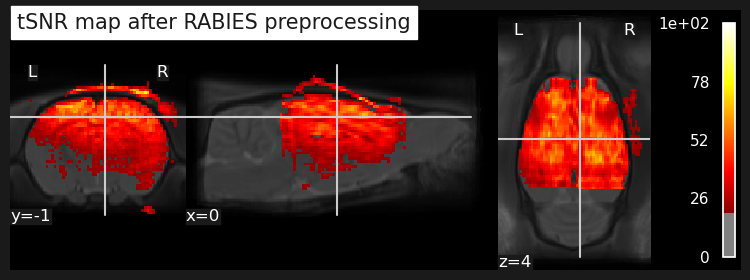

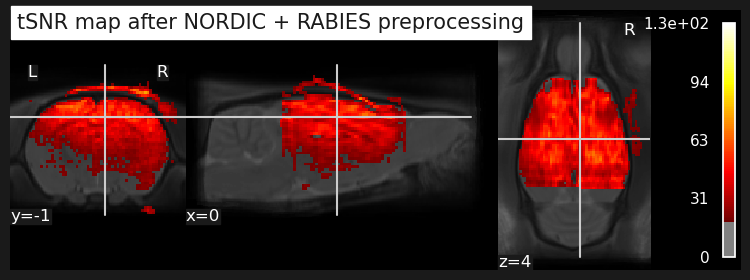

In [26]:
# -- plot tSNR for 1 subject, RABIES // NORDIC -- 
tSNR_map_rab = nib.load(tSNR_rabies_dir+'sub-0200100_ses-1_tSNR_map.nii.gz')
tSNR_map_nord = nib.load(tSNR_nordic_dir+'sub-0200100_ses-1_tSNR_map_nordic.nii.gz')

plotting.plot_stat_map(tSNR_map_rab, 
                       bg_img = template_path, 
                       threshold=20, 
                       title='tSNR map after RABIES preprocessing')

plt.savefig(output_folder+'/image/tSNR_map_rabies_sub-0200100.png')

plotting.plot_stat_map(tSNR_map_nord, 
                       bg_img = template_path, 
                       threshold=20, 
                       title='tSNR map after NORDIC + RABIES preprocessing')

plt.savefig(output_folder+'/image/tSNR_map_nordic_sub-0200100.png') 


In [8]:
# -- Calculte averaged tSNR per rat -- 

df = pd.read_csv(df_path, sep='\t')                               #reads a .csv file and and stores the data in a paandas dataframe

# RABIES: average tSNR after rabies 
tsnr_rab_list = glob.glob(tSNR_rabies_dir+'/sub*')                 # list files in tSNR 
print(len(tsnr_rab_list), 'files in tSNR rabies')                         # should be 178
df["tsnr_rabies"] = np.nan                                         #adds a new column "tsnr" to the df called, initializes all values to NaN

for file_tsnr in tsnr_rab_list[1:len(tsnr_rab_list)]:               #tsnr_rab_list[1:len(tsnr_rab_list)]:
    
    rat_id = int(re.search("2[0-9]{5,8}", file_tsnr).group())        #find sub_id in the path, using regular expression
    print('rat', rat_id)
    file_tsnr = np.array(nib.load(file_tsnr).dataobj)                #load the nifti file containing tSNR, convert to numpy array, which is 3D
    tsnr_mean = np.mean(file_tsnr)                               #
    print('Mean tSNR:', tsnr_mean)
    
    df.loc[(df['rat.sub'] == rat_id), ['tsnr_rabies']]=(tsnr_mean) 
    df.to_csv(df_path, sep='\t', index=False)
    
    
# NORDIC: average tSNR after nordic+rabies 

tsnr_nord_list = glob.glob(tSNR_nordic_dir+'/sub*')                 # list files in tSNR 
print(len(tsnr_nord_list), 'files in tSNR nordic')                            # should be 178
df["tsnr_nordic"] = np.nan                                               #adds a new column "tsnr" to the df called, initializes all values to NaN

for file_tsnr in tsnr_nord_list[1:len(tsnr_nord_list)]:
    
    rat_id = int(re.search("2[0-9]{5,8}", file_tsnr).group())        #find sub_id in the path, using regular expression
    print('rat', rat_id)
    file_tsnr = np.array(nib.load(file_tsnr).dataobj)                #load the nifti file containing tSNR, convert to numpy array, which is 3D
    tsnr_mean = np.mean(file_tsnr)                                   #
    print('Mean tSNR:', tsnr_mean)
    
    df.loc[(df['rat.sub'] == rat_id), ['tsnr_nordic']]=(tsnr_mean) 
    df.to_csv(df_path, sep='\t', index=False)


178 files in tSNR rabies
rat 200100
Mean tSNR: 5.038453
rat 200102
Mean tSNR: 6.684618
rat 200103
Mean tSNR: 7.2392726
rat 200104
Mean tSNR: 4.1028905
rat 200105
Mean tSNR: 3.81867
rat 200107
Mean tSNR: 4.3356814
rat 200201
Mean tSNR: 17.27364
rat 200200
Mean tSNR: 13.76911
rat 200108
Mean tSNR: 3.7432284
rat 200203
Mean tSNR: 18.269714
rat 200202
Mean tSNR: 14.555438
rat 200204
Mean tSNR: 18.558819
rat 200206
Mean tSNR: 18.948967
rat 200205
Mean tSNR: 17.6735
rat 200207
Mean tSNR: 18.068054
rat 200208
Mean tSNR: 17.95967
rat 200300
Mean tSNR: 2.1506302
rat 200301
Mean tSNR: 3.5284162
rat 200302
Mean tSNR: 5.1629477
rat 200304
Mean tSNR: 3.3983006
rat 200307
Mean tSNR: 3.4521248
rat 200305
Mean tSNR: 3.8407855
rat 200308
Mean tSNR: 1.7108814
rat 200109
Mean tSNR: 2.8161123
rat 200403
Mean tSNR: 3.61959
rat 200309
Mean tSNR: 1.3759946
rat 200503
Mean tSNR: 2.9404156
rat 200407
Mean tSNR: 3.1969767
rat 200400
Mean tSNR: 3.2452328
rat 200404
Mean tSNR: 3.099568
rat 200501
Mean tSNR: 2.973

/home/traaffneu/margal/.conda/envs/MultiRatStim/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 12.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/traaffneu/margal/.conda/envs/MultiRatStim/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 30.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/traaffneu/margal/.conda/envs/MultiRatStim/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 14.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/traaffneu/margal/.conda/envs/MultiRatStim/lib/python3.9/site-packages/seaborn/categorical.py:3544: UserWarning: 38.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warn

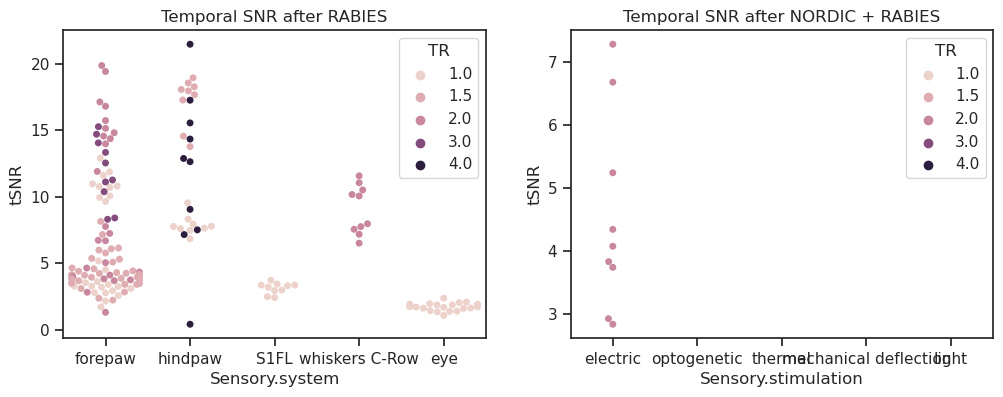

In [27]:
# Remove excluded scans
df_exclude = df.loc[(df['exclude'] != 'yes')]

#Plot averaged tSNR for each scan, after RABIES only

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))

sns.set_theme(style="whitegrid", palette="muted")
sns.set_palette("colorblind")

ax0 = sns.swarmplot(data=df_exclude, x="func.sensory.system",
                    y="tsnr_rabies", hue="func.TR", ax=axes[0])

ax1 = sns.swarmplot(data=df_exclude, x="func.sensory.stimulation",
                    y="tsnr_nordic", hue="func.TR", ax=axes[1])

# ax2 = sns.swarmplot(data=df_exclude, x="MRI.field.strength",
#                     y="tsnr_rabies", hue="func.TR", ax=axes[2])

# ax3 = sns.swarmplot(data=df_exclude, x="MRI.field.strength",
                    # y="tsnr_nordic", hue="func.TR", ax=axes[3])


ax0.set(xlabel='Sensory.system', ylabel='tSNR', title='Temporal SNR after RABIES')
ax0.get_legend().set_title('TR')

ax1.set(xlabel='Sensory.stimulation', ylabel='tSNR', title='Temporal SNR after NORDIC + RABIES')
ax1.get_legend().set_title('TR')

# ax2.set(xlabel='Field Strength', ylabel='tSNR')
# ax2.get_legend().set_title('TR')

# ax3.set(xlabel='Field Strength', ylabel='tSNR')
# ax3.get_legend().set_title('TR')

<AxesSubplot: xlabel='MRI.field.strength', ylabel='tsnr_nordic'>

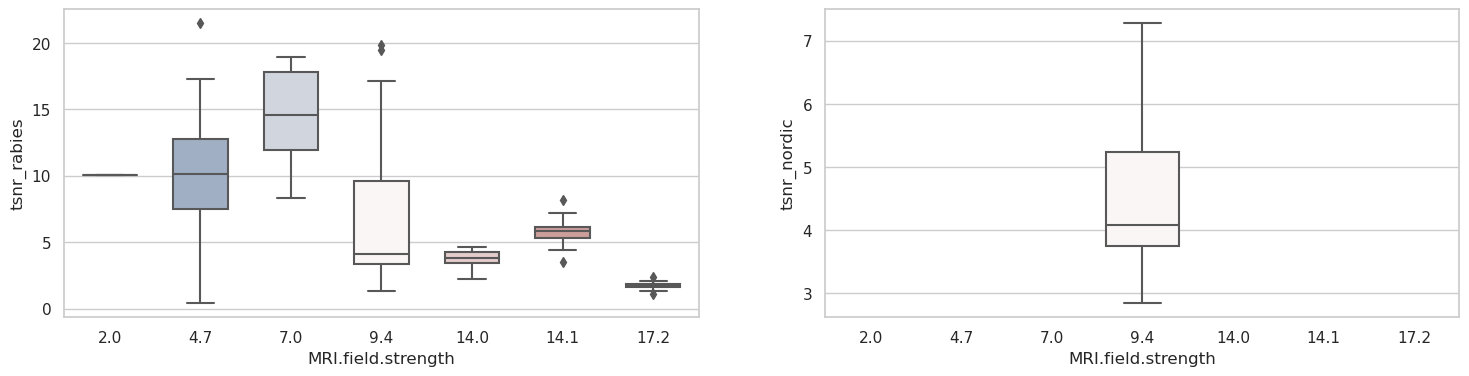

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(18, 4))

sns.set_theme(style="ticks")
sns.set_palette("colorblind")

sns.boxplot(data=df_exclude, x="MRI.field.strength", 
            y="tsnr_rabies", width=.6, palette="vlag", ax=axes[0])

sns.boxplot(data=df_exclude, x="MRI.field.strength", 
            y="tsnr_nordic", palette="vlag", ax=axes[1])

/home/traaffneu/margal/.conda/envs/MultiRatStim/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:b'` for same effect.
  warnings.warn(msg, FutureWarning)
/home/traaffneu/margal/.conda/envs/MultiRatStim/lib/python3.9/site-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:b'` for same effect.
  warnings.warn(msg, FutureWarning)


177


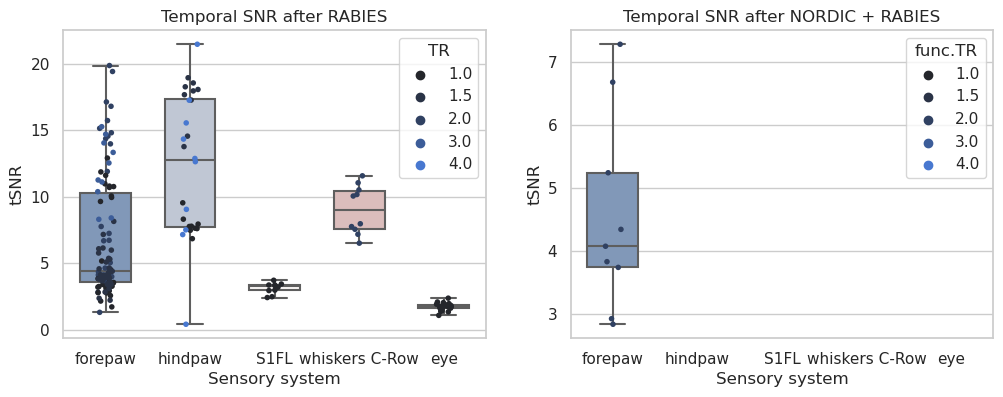

In [28]:
sns.set_palette("colorblind")

f, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

ax0 = sns.boxplot(data=df_exclude, x="func.sensory.system", y="tsnr_rabies", 
            color="k", whis=[0, 100], width=.6, palette="vlag", ax=axes[0])

ax0 = sns.stripplot(data=df_exclude, x="func.sensory.system", y="tsnr_rabies",
              size=4, color='b', hue="func.TR", linewidth=0, ax=axes[0])

ax1 = sns.boxplot(data=df_exclude, x="func.sensory.system", y="tsnr_nordic", 
            color="k", whis=[0, 100], width=.6, palette="vlag", ax=axes[1])

ax1 = sns.stripplot(data=df_exclude, x="func.sensory.system", y="tsnr_nordic",
                    size=4, color='b', hue="func.TR", linewidth=0, ax=axes[1])

ax0.set(xlabel='Sensory system', ylabel='tSNR', title='Temporal SNR after RABIES')
ax0.get_legend().set_title('TR')

ax1.set(xlabel='Sensory system', ylabel='tSNR', title='Temporal SNR after NORDIC + RABIES')
ax0.get_legend().set_title('TR')

print(len(df_exclude))

plt.savefig(output_folder+"/box_plots/tSNR_rabies_vs_nordic")